In [45]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

In [46]:
shapefile = 'datos_geo/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

In [47]:
gdf = gpd.read_file(shapefile)

In [48]:
gdf.shape


(177, 95)

In [49]:
gdf.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:

gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.head()

,ADMIN,ADM0_A3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [51]:
gdf.rename(columns={'ADMIN':'country', 'ADM0_A3':'code'}, inplace=True)

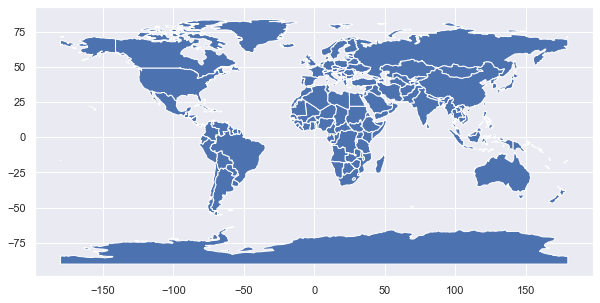

In [52]:
gdf.plot()

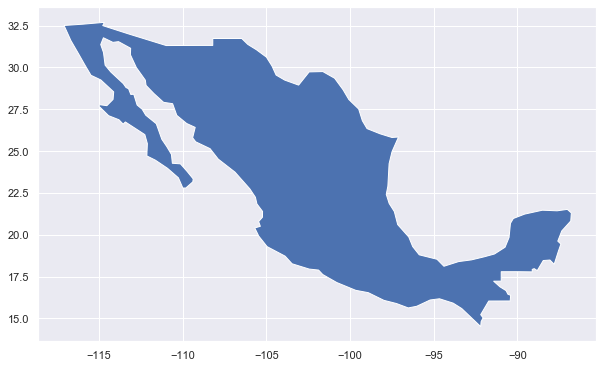

In [53]:
gdf[gdf.code =='MEX'].plot()

In [54]:
obesity_data = 'datos_geo/share-of-adults-defined-as-obese.csv'

In [55]:
df = pd.read_csv(obesity_data)

In [56]:
df.head()


,Entity,Code,Year,Share of adults who are obese (%)
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [57]:
df[df.Code=='MEX'].tail()

,Entity,Code,Year,Share of adults who are obese (%)
4825,Mexico,MEX,2012,26.8
4826,Mexico,MEX,2013,27.3
4827,Mexico,MEX,2014,27.8
4828,Mexico,MEX,2015,28.3
4829,Mexico,MEX,2016,28.9


In [58]:
df.columns = ['country', 'code', 'year', 'share_adults_obese']

In [59]:
df.head()


,country,code,year,share_adults_obese
0,Afghanistan,AFG,1975,0.5
1,Afghanistan,AFG,1976,0.5
2,Afghanistan,AFG,1977,0.6
3,Afghanistan,AFG,1978,0.6
4,Afghanistan,AFG,1979,0.6


In [60]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
country               8316 non-null object
code                  7980 non-null object
year                  8316 non-null int64
share_adults_obese    8316 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


In [61]:
df[df.code.isna()]


,country,code,year,share_adults_obese
42,Africa,NaN,1975,2.0
43,Africa,NaN,1976,2.1
44,Africa,NaN,1977,2.2
45,Africa,NaN,1978,2.3
46,Africa,NaN,1979,2.3
...,...,...,...,...
8185,Western Pacific,NaN,2012,5.2
8186,Western Pacific,NaN,2013,5.5
8187,Western Pacific,NaN,2014,5.8
8188,Western Pacific,NaN,2015,6.1


In [62]:
df.isna().sum()

country                 0
code                  336
year                    0
share_adults_obese      0
dtype: int64

In [63]:
df=df.dropna()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7980 entries, 0 to 8315
Data columns (total 4 columns):
country               7980 non-null object
code                  7980 non-null object
year                  7980 non-null int64
share_adults_obese    7980 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 311.7+ KB


In [65]:
###primero eliminamos la columna repetida (country)

In [66]:
df.drop(['country'], axis=1, inplace=True)

In [67]:
gdf = gdf.merge(df)

In [68]:
gdf.head()

,country,code,geometry,year,share_adults_obese
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1975,9.5
1,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1976,9.8
2,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1977,10.1
3,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1978,10.5
4,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1979,10.8


In [69]:
datos_1980=gdf[gdf.year == 1980]

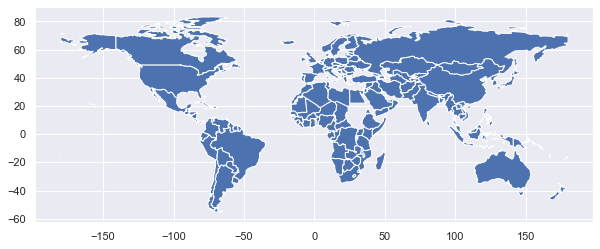

In [70]:
datos_1980.plot()

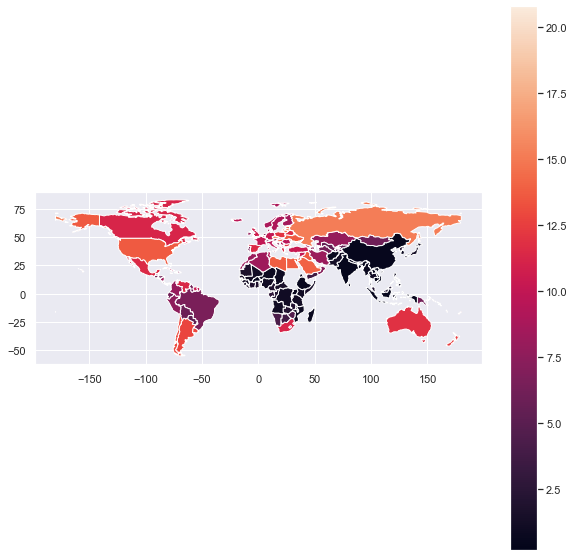

In [73]:
datos_1980.plot(column='share_adults_obese', legend=True)

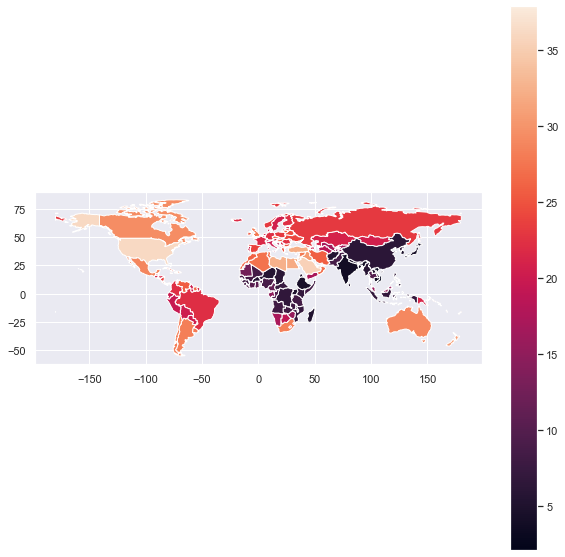

In [74]:
datos_2016=gdf[gdf.year == 2016]
datos_2016.plot(column='share_adults_obese', legend=True)